# 『5과목』 AI와 딥러닝

# Setup

In [82]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

#### 최소제곱법(OLS)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

df = pd.read_csv('SamsungElectronics_Gumi/datasets/scores_reg.csv')
n = len(df)
print(n)
print("=" * 80)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


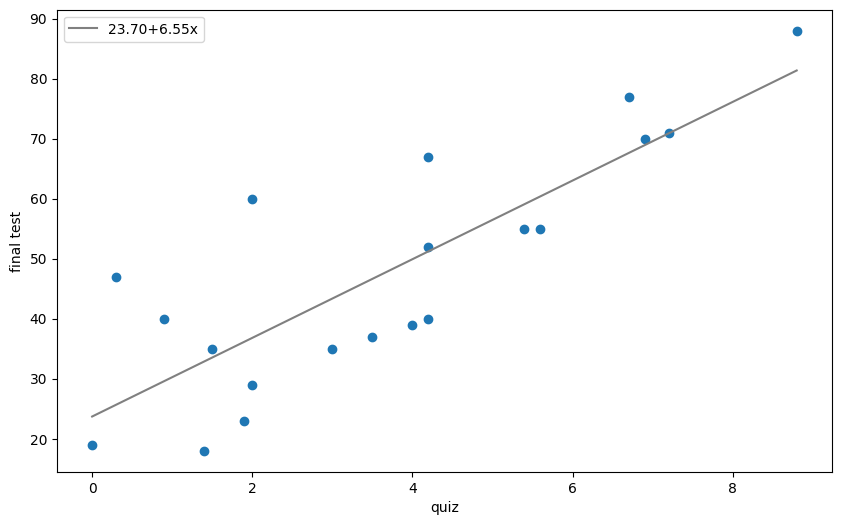

In [3]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

In [4]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        18:58:01   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [6]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat)

print("=" * 80)

y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

s_var = np.var(eps_hat, ddof=p+1)
print(s_var)

23.699495346731215 6.553732606043083
134.29043473495898


<ipython-input-6-8747b09d026c>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


In [7]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645704, 1.0685841387335373)

In [8]:
rv = stats.t(n-2)
lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
print(lcl, hcl)

print("=" * 80)

rv = stats.t(n-2)
lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
print(lcl, hcl)

13.79609127276025 33.60289942070218
4.308720637125891 8.798744574960276


In [9]:
t = beta1_hat / np.sqrt(s_var * C1)
print(t)

print("=" * 80)

print((1 - rv.cdf(t)) * 2)

6.1330992745320225
8.590875866687497e-06


In [10]:
t = beta0_hat / np.sqrt(s_var * C0)
print(t)

print("=" * 80)

print((1 - rv.cdf(t)) * 2)

5.0276442064401285
8.745298393209033e-05


In [11]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           6.19e-06
Time:                        18:58:02   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
print(beta0_hat, beta1_hat, beta2_hat)

print("=" * 80)

y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
print(lcl, hcl)

-1.8709143470995777 6.428878343002363 4.1917065463986845
0.4402533325435849 7.943159760253783


<ipython-input-12-90c355f28dc5>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


In [13]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           7.47e-05
Time:                        18:58:02   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        18:58:02   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y_hat = np.array(result.fittedvalues)
print(y_hat)
print("=" * 80)

eps_hat = np.array(result.resid)
print(eps_hat)
print("=" * 80)

print(np.sum(eps_hat ** 2))

[51.225 70.886 23.699 43.361 33.53  29.598 36.152 46.638 49.914 59.09
 51.225 68.92  36.807 81.372 25.666 67.61  51.225 60.4   32.875 36.807]
[ 15.775   0.114  -4.699  -8.361   1.47   10.402 -13.152  -9.638 -10.914
  -4.09  -11.225   1.08   -7.807   6.628  21.334   9.39    0.775  -5.4
 -14.875  23.193]
2417.2278252292617


In [16]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

print(total_var, exp_var + unexp_var)
print("=" * 80)

print(exp_var / total_var)
print("=" * 80)

print(np.corrcoef(x, y)[0, 1] ** 2)

7468.55 7468.549999999996
0.6763457665504996
0.6763457665504998


In [17]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033058

In [18]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
print(f)

print("=" * 80)

rv = stats.f(p, n-p-1)
print(1 - rv.cdf(f))

37.61490671126523
8.590875866687497e-06


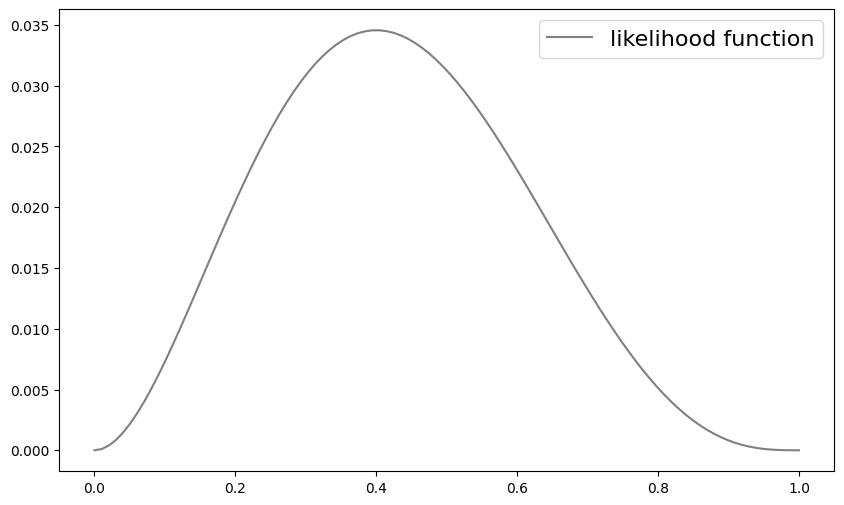

In [19]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

In [20]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
print(mll)
print("=" * 80)

rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
print(mll)
print("=" * 80)

aic = -2 * mll + 2 * (p+1)
print(aic)
print("=" * 80)

bic = -2 * mll + np.log(n) * (p+1)
print(bic)

-3.365058335046282
-76.32521428624038
156.65042857248076
158.64189311958876


In [21]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           6.19e-06
Time:                        18:58:03   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
eps_hat = np.array(result.resid)


print(stats.skew(eps_hat))
print("=" * 80)
print(stats.kurtosis(eps_hat, fisher=False))

0.6599489486177468
2.4365833256763016


In [23]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508218526442302

In [24]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [25]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 22 Nov 2024   Prob (F-statistic):           8.59e-06
Time:                        18:58:04   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 기계 학습(선형 회귀의 경사하강법)

In [26]:
### 기계 학습(선형 회귀의 경사하강법)import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
file_path = 'SamsungElectronics_Gumi/datasets/scores_reg.csv'
data = pd.read_csv(file_path)

data

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


Optimized Parameters (Theta): [47.848 14.548  5.901 -0.882 -3.77 ]


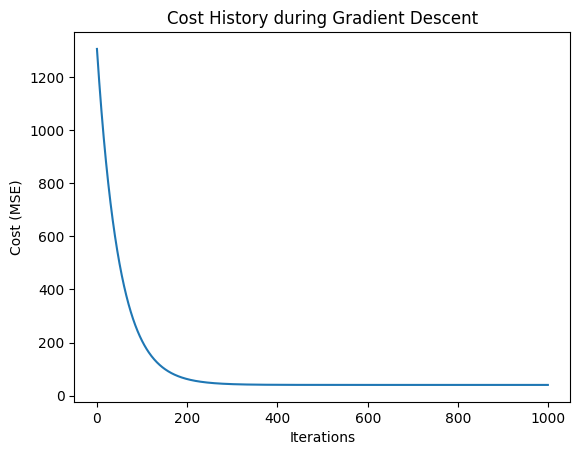

First 5 Predictions: [57.295 80.309 23.499 42.439 36.609]
First 5 Actual Values: [67 71 19 35 35]


In [27]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['school_method'], drop_first=True)

# Separate features and target variable
X = data.drop('final_test', axis=1).values
y = data['final_test'].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias column to X (intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Parameters for gradient descent
m, n = X.shape  # Number of samples (m) and features (n)
theta = np.zeros(n)  # Initialize parameters to zero
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations

# Define functions for cost computation and gradient descent
def compute_cost(X, y, theta):
    """Compute the mean squared error cost."""
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    """Perform gradient descent to minimize the cost function."""
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute gradients
        predictions = X.dot(theta)
        gradients = (1 / m) * X.T.dot(predictions - y)
        # Update parameters
        theta -= alpha * gradients
        # Store the cost
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Results
print("Optimized Parameters (Theta):", theta)

# Visualize the cost history
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History during Gradient Descent')
plt.show()

# Make predictions with the optimized model
def predict(X, theta):
    return X.dot(theta)

# Example prediction
predictions = predict(X, theta)
print("First 5 Predictions:", predictions[:5])
print("First 5 Actual Values:", y[:5])

#### NN-MLP with Backpropagation

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
file_path = 'SamsungElectronics_Gumi/datasets/scores_reg.csv'
data = pd.read_csv(file_path)

data

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


Iteration 0, Loss: 1331.5278
Iteration 100, Loss: 31.0282
Iteration 200, Loss: 18.9249
Iteration 300, Loss: 17.9008
Iteration 400, Loss: 16.7033
Iteration 500, Loss: 16.3531
Iteration 600, Loss: 16.3253
Iteration 700, Loss: 16.3047
Iteration 800, Loss: 16.3124
Iteration 900, Loss: 16.2832


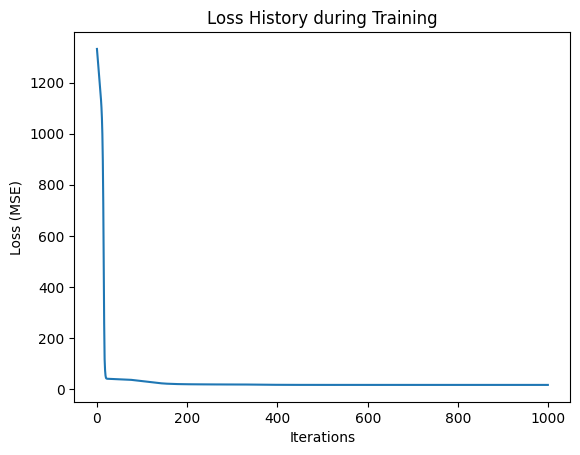

First 5 Predictions: [57.449 75.974 18.814 41.282 45.532]
First 5 Actual Values: [67 71 19 35 35]


In [29]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['school_method'], drop_first=True)

# Separate features and target variable
X = data.drop('final_test', axis=1).values
y = data['final_test'].values.reshape(-1, 1)  # Reshape for neural network

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Neural Network Parameters
input_size = X.shape[1]  # Number of input features
hidden_size = 10  # Number of neurons in hidden layer
output_size = 1  # Single output (final_test score)

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights for input -> hidden
b1 = np.zeros((1, hidden_size))  # Bias for hidden layer
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights for hidden -> output
b2 = np.zeros((1, output_size))  # Bias for output layer

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Mean Squared Error loss
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)

# Learning parameters
alpha = 0.01  # Learning rate
iterations = 1000

# Training the MLP using Backpropagation
loss_history = []

for i in range(iterations):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # Hidden layer activation
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Output layer (no activation since it's regression)

    # Compute loss
    loss = compute_loss(y, A2)
    loss_history.append(loss)

    # Backward propagation
    m = y.shape[0]
    dZ2 = A2 - y  # Derivative of loss w.r.t. Z2
    dW2 = (1 / m) * np.dot(A1.T, dZ2)  # Gradient for W2
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)  # Gradient for b2

    dA1 = np.dot(dZ2, W2.T)  # Backpropagate to hidden layer
    dZ1 = dA1 * relu_derivative(Z1)  # Derivative of ReLU
    dW1 = (1 / m) * np.dot(X.T, dZ1)  # Gradient for W1
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)  # Gradient for b1

    # Update weights and biases
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W1 -= alpha * dW1
    b1 -= alpha * db1

    # Print loss every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

# Plot loss history
import matplotlib.pyplot as plt
plt.plot(range(iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss History during Training')
plt.show()

# Predictions
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    return Z2

predictions = predict(X, W1, b1, W2, b2)
print("First 5 Predictions:", predictions[:5].flatten())
print("First 5 Actual Values:", y[:5].flatten())

#### Random Forest

In [30]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


In [32]:
# 특성 중요도
print("특성 중요도 : \n{}".format(forest.feature_importances_))

특성 중요도 : 
[0.101 0.034 0.469 0.395]


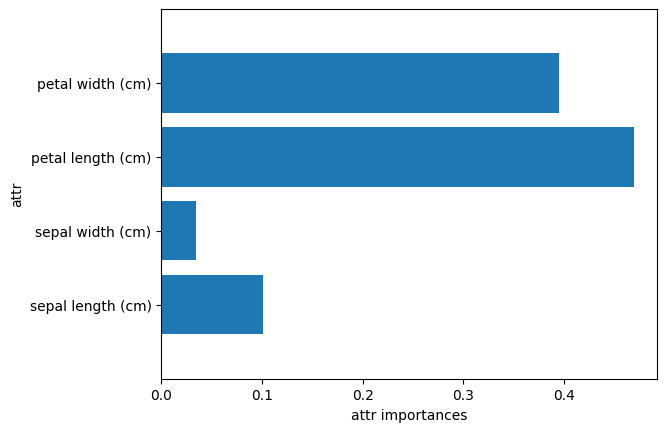

In [33]:
# 특성 중요도 시각화 하기
def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

plot_feature_importances_iris(forest)
plt.show()

#### Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets

# 데이터 로드 - 아이리스
iris = datasets.load_iris()

# 특성 초기화
data = iris.data
target = iris.target

In [35]:
# 부스팅 관련 분류기 객체 생성
gradientboost = GradientBoostingClassifier(random_state=0)

# 훈련
rs_gb = gradientboost.fit(data, target)

In [36]:
rs_gb.feature_importances_

array([0.006, 0.012, 0.307, 0.675])

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

# 훈련/테스트 세트로 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


In [38]:
# 사전 가지치기 설정 (max_depth=1)
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


In [39]:
# 학습률 낮추기 (learning_rate=0.01)
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

gbrt.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.974


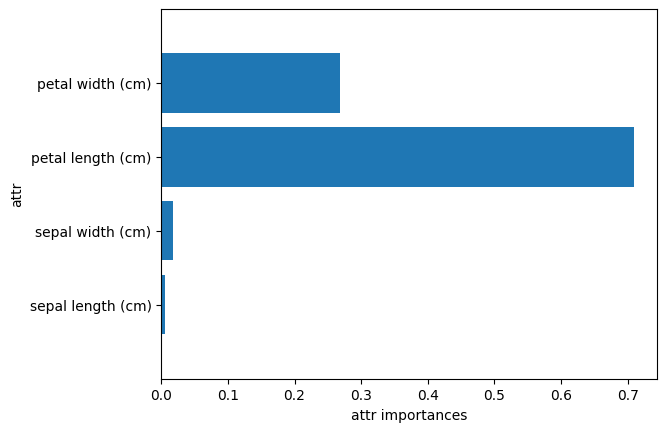

In [40]:
# 특성 중요도 시각화 함수 정의
def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)

# 특성 중요도 시각화
plot_feature_importances_iris(gbrt)
plt.show()

#『4과목』 인공 지능

## 인공지능개관

### 머신러닝-ANN 기초

#### 데이터 셋

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [4]:
diabetes.target[:3]

array([151.,  75., 141.])

In [5]:
import matplotlib.pyplot as plt

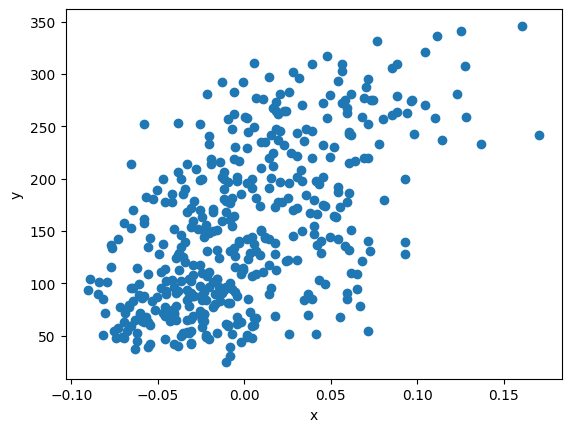

In [6]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
x = diabetes.data[:, 2]
y = diabetes.target

<퀴즈> 슬라이싱을 사용해 훈련 데이터 x에서 100번째 부터 109번째 까지 샘플을 출력해 보세요. 슬라이싱한 배열의 크기는 얼마인가요?

In [8]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)


#### 경사 하강법에 대해 알아봅니다

In [9]:
w = 1.0
b = 1.0

In [10]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186832


In [11]:
print(y[0])

151.0


In [12]:
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
print(y_hat_inc)

1.0678658271705517


In [13]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.06169620651868429


In [14]:
w_new = w + w_rate
print(w_new)

1.0616962065186843


In [15]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

1.1616962065186833


In [16]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.0


In [17]:
b_new = b + 1
print(b_new)

2.0


In [18]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [19]:
y_hat = x[0]*w_new + b_new
print(y[0])
print(y_hat)

151.0
151.57072844302783


In [20]:
y_hat = x[1]*w_new + b_new
print(y[1])
print(y_hat)

75.0
150.41066251735475


In [21]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [22]:
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


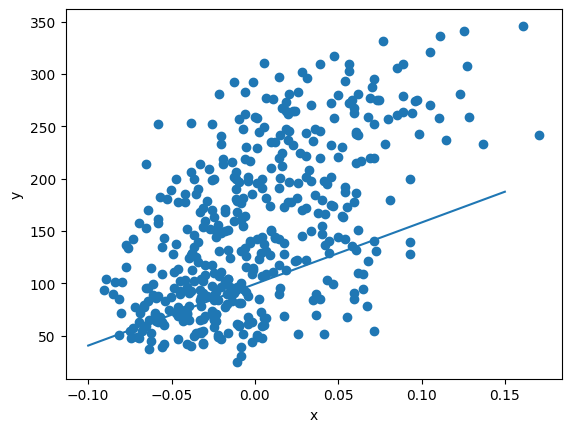

In [23]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
for i in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


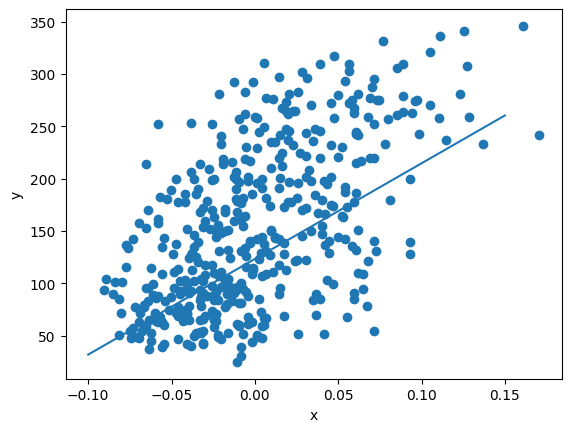

In [25]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [26]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

287.8416643900139


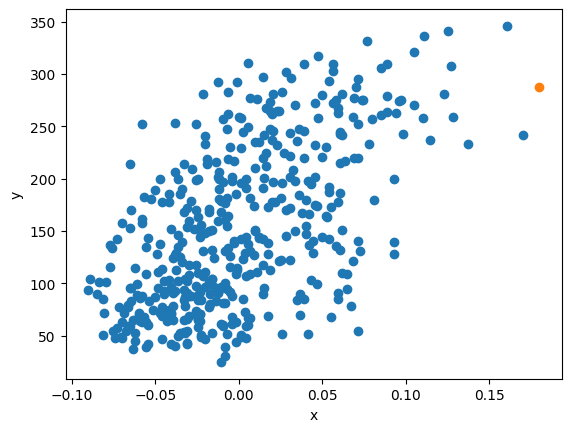

In [27]:
plt.scatter(x, y)
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 선형 회귀를 위한 뉴런(유닛)의 구현

In [28]:
class Neuron:

    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다

    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=100):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                err = -(y_i - y_hat)      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad          # 가중치 업데이트
                self.b -= b_grad          # 절편 업데이트

In [29]:
neuron = Neuron()
neuron.fit(x, y)

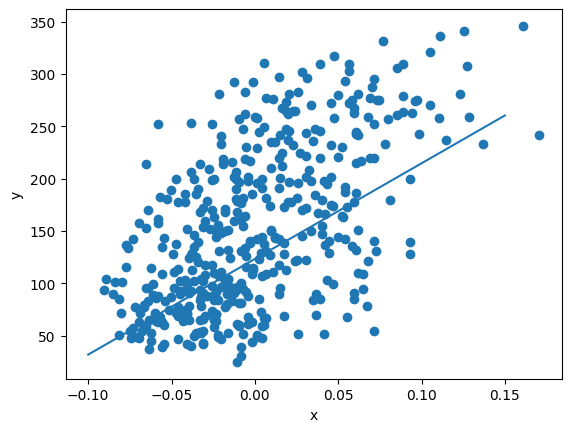

In [30]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## MLP

### Perceptron-SingleLayer

파이썬으로 간단하게 구현한 퍼셉트론-1

In [73]:
import numpy as np
X=np.array([1,0,1])
X

array([1, 0, 1])

In [74]:
W=np.array([
    -0.5,
    1.0,
    1.0
])
W

array([-0.5,  1. ,  1. ])

In [75]:
y=sum(X*W)
y

np.float64(0.5)

파이썬으로 간단하게 구현한 퍼셉트론-2

In [76]:
import numpy as np
X=np.array([
            [1,0,0],
            [1,0,1],
            [1,1,0],
            [1,1,1]
])
X

array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [77]:
W=np.array([
    -0.5,
    1.0,
    1.0
])
W

array([-0.5,  1. ,  1. ])

In [78]:
y=np.sum(X*W, axis=1)
y

array([-0.5,  0.5,  0.5,  1.5])

Scikit-Learn의 Perceptron 클래스

Scikit-Learn은 하나의 TLU 퍼셉트론을 구현한 Perceptron 클래스를 제공한다. 아래의 예제는 iris dataset(붓꽃 데이터셋)에서 꽃잎의 길이(petal length)와 너비(petal width)를 가지고 붓꽃 종류 중 Setosa인지 아닌지를 분류하는 이진 분류기를 구현한 것이다.

In [79]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, width
y = (iris.target == 0).astype(int)  # Use `int` instead of `np.int`

# Create a Perceptron classifier
per_clf = Perceptron(max_iter=100, random_state=42)

# Train the Perceptron classifier
per_clf.fit(X, y)

Perceptron(max_iter=100, random_state=42)

In [80]:
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


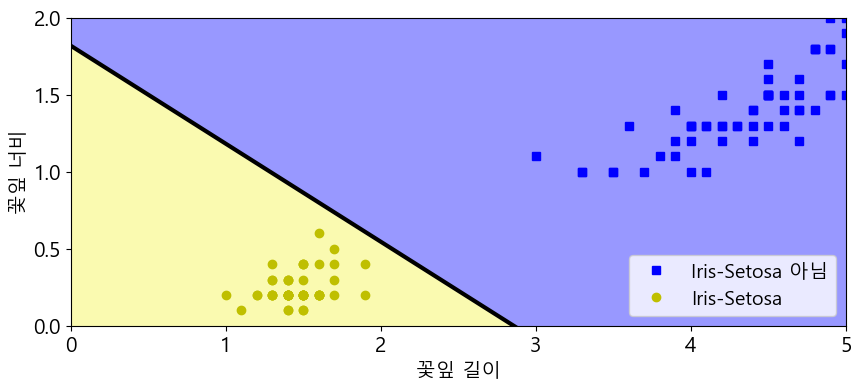

In [83]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa 아님")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.show()

AND 게이트 문제를 해결하는 SLP 만들어 보기
``
버전 1 : 구조만-단순 계산

In [85]:
import numpy as np
def ANDperceptron(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

inputData = np.array([[0,0],[0,1],[1,0],[1,1]])

print("+++ AND Perceptron +++")
for xs in inputData:
    print(str(xs) + " >>> " + str(ANDperceptron(xs[0], xs[1])))

+++ AND Perceptron +++
[0 0] >>> 0
[0 1] >>> 0
[1 0] >>> 0
[1 1] >>> 1


버전 2: 편향 추가 모양새(가설식) 완성

In [88]:
import numpy as np
def ANDperceptron(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1
    
inputData = np.array([[0,0],[0,1],[1,0],[1,1]])

print("+++ AND Perceptron +++")

for xs in inputData:
    print(str(xs) + " >>> " + str(ANDperceptron(xs[0], xs[1])))

+++ AND Perceptron +++
[0 0] >>> 0
[0 1] >>> 0
[1 0] >>> 0
[1 1] >>> 1


버전 3: 라벨 변수 사용과 가중치 초기화

In [89]:
import numpy as np

# AND 데이터 만들기

X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 0, 0, 1])

# 1단계 : 가중치 초기화

w = np.zeros(1 + X.shape[1])

# 최초 분류

input_signal = np.dot(X, w[1:]) + w[0]
def out_put(X):
    return np.where(X >= 0.0, 1, 0)
pred_y = out_put(input_signal)
print(pred_y)

[1 1 1 1]


In [90]:
# 가중치 최적화 시작 4. 학습을 시키겠습니다.

errors = [] # y-y_hat 오차
epoch = 100 # 반복 학습 시 가장 중요한 요소 

for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break

print(pred_y)

0번째 반복 입니다
0.01
1번째 반복 입니다
0.01
2번째 반복 입니다
-0.02
3번째 반복 입니다
0.01
4번째 반복 입니다
0.0
[0 0 0 1]


OR 게이트 단순 퍼셉트론 화

In [91]:
import numpy as np

# OR 데이터 만들기
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([0, 1, 1, 1])

# 1단계 : 가중치 초기화
w = np.zeros(1 + X.shape[1])

# 최초 분류
input_signal = np.dot(X, w[1:]) + w[0]

def out_put(X):
    return np.where(X >= 0.0, 1, 0)

pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작
errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break
print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.03
1번째 반복 입니다
-0.01
2번째 반복 입니다
-0.01
3번째 반복 입니다
-0.01
4번째 반복 입니다
0.0
[0 1 1 1]


NAND 게이트 단순 퍼셉트론 화

In [92]:
import numpy as np

# NAND 데이터 만들기
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 0, 0, 0])

# 1단계 : 가중치 초기화
w = np.zeros(1 + X.shape[1])

# 최초 분류
input_signal = np.dot(X, w[1:]) + w[0]

def out_put(X):
    return np.where(X >= 0.0, 1, 0)

pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작
errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break
print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.01
1번째 반복 입니다
0.01
2번째 반복 입니다
0.01
3번째 반복 입니다
0.0
[1 0 0 0]


Quiz- NOR 게이트 단순 퍼셉트론

In [93]:
import numpy as np

# Quiz- NOR 데이터 만들기
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = np.array([1, 1, 1, 0])

# 1단계 : 가중치 초기화
w = np.zeros(1 + X.shape[1])

# 최초 분류
input_signal = np.dot(X, w[1:]) + w[0]

def out_put(X):
    return np.where(X >= 0.0, 1, 0)

pred_y = out_put(input_signal)
print(pred_y)

# 가중치 최적화 시작
errors = []
epoch = 100
for time in range(0, epoch):
    print("{0}번째 반복 입니다".format(time))
    eta = 0.01
    idx = 0
    for xi, target in zip(X, y):
        updated_w = eta * (target - pred_y[idx])
        w[1:] += updated_w * xi
        w[0] += updated_w
        idx += 1
    input_signal = np.dot(X, w[1:]) + w[0]
    pred_y = out_put(input_signal)
    errors.append(((y - pred_y).sum()) / 100)
    print(((y - pred_y).sum()) / 100)
    if ((y - pred_y).sum()) / 100 == 0:
        break
print(pred_y)

[1 1 1 1]
0번째 반복 입니다
0.03
1번째 반복 입니다
-0.01
2번째 반복 입니다
0.0
[1 1 1 0]


### MLP

#### SLP의 한계-도전! XOR 게이트

In [94]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [95]:
import numpy as np

print(XOR(0,0))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(1,1))

0
1
1
0


#### 머신러닝으로 로지스틱 함수 사용해 보기

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [32]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis']= b_cancer.target
b_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [33]:
print('유방암 진단 데이터셋 크기: ', b_cancer_df.shape)

유방암 진단 데이터셋 크기:  (569, 31)


In [34]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

print(b_cancer.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [36]:
print(b_cancer_scaled[0])

[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
  2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
  2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
  1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
  1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#로지스틱 회귀 분석: (1) 모델 생성
lr_b_cancer = LogisticRegression()

#로지스틱 회귀 분석: (2) 모델 훈련
lr_b_cancer.fit(X_train, Y_train)

#로지스틱 회귀 분석: (3) 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#오차 행렬
confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]])

In [39]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}, F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

정확도: 0.977, 정밀도: 0.973, 재현율: 0.991, F1: 0.982


In [40]:
print('ROC_AUC: {0:.3f}'.format(roc_auc))

ROC_AUC: 0.972


#### 로지스틱 함수 ANN에서 사용해 보기

단일층 신경망 훈련하기

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [42]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

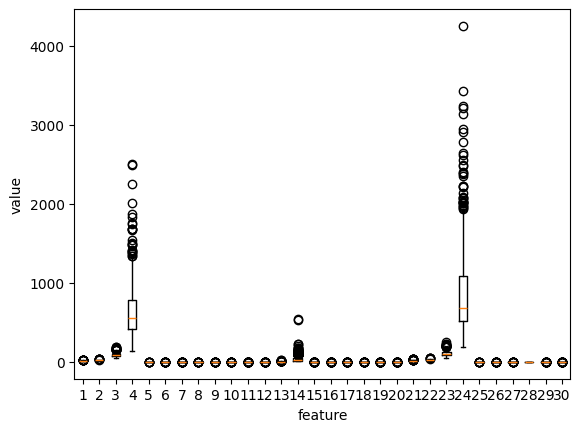

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [44]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [45]:
import numpy as np
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [46]:
x = cancer.data
y = cancer.target

In [47]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [48]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [49]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285]))

In [50]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = -err*x
        b_grad = -err*1
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = y_i - a
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

In [51]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)

C:\Users\k8s\AppData\Local\Temp\ipykernel_7328\2836949028.py:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


np.float64(0.8245614035087719)

In [52]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = -err*x
        b_grad = -err*1
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for _ in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = y[i] - a
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)

                loss += -(y[i]*np.log(a) + (1 - y[i])*np.log(1 - a))
            self.losses.append(loss/len(y))

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [53]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\Users\k8s\AppData\Local\Temp\ipykernel_7328\688682430.py:17: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


np.float64(0.9385964912280702)

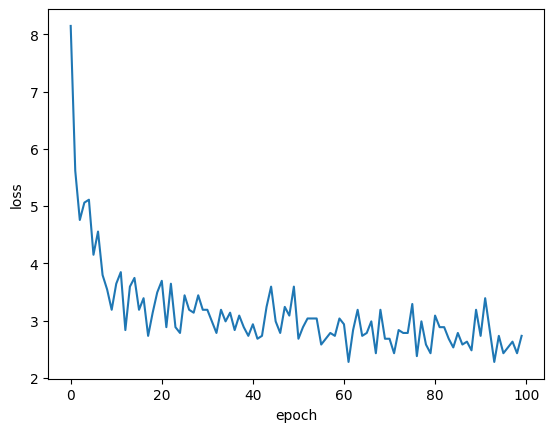

In [54]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 2개의 층을 가진 신경망 구현해보기

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [56]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

364 91


In [57]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [58]:
x_val_scaled = (x_val - train_mean) / train_std

In [59]:
class SingleLayer:
    def __init__(self, learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.val_losses = []
        self.w_history = []
        self.lr = learning_rate

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self, x, err):
        w_grad = -err*x
        b_grad = -err*1
        return w_grad, b_grad

    def activation(self, z):
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for _ in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = y[i] - a
                w_grad, b_grad = self.backprop(x[i], err)
                self.w -= self.lr*w_grad
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1 - y[i])*np.log(1 - a))
            self.losses.append(loss/len(y))
            self.update_val_loss(x_val, y_val)

    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

    def update_val_loss(self, x_val, y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1 - y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))

In [60]:
class DualLayer(SingleLayer):

    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):
        self.units = units
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.a1 = None
        self.losses = []
        self.val_losses = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.activation(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2

    def backprop(self, x, err):
        m = len(x)
        w2_grad = np.dot(self.a1.T, -err) / m
        b2_grad = np.sum(-err) / m
        err_to_hidden = np.dot(-err, self.w2.T)*self.a1*(1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def init_weights(self, n_features):
        self.w1 = np.ones((n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.ones((self.units, 1))
        self.b2 = 0

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        m = len(x)
        self.init_weights(x.shape[1])

        for _ in range(epochs):
            a = self.training(x, y, m)
            a = np.clip(a, 1e-10, 1-1e-10)
            loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
            self.losses.append((loss + self.reg_loss()) / m)
            self.update_val_loss(x_val, y_val)

    def training(self, x, y, m):
        z = self.forpass(x)
        a = self.activation(z)
        err = y - a

        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        w1_grad += (self.l1*np.sign(self.w1) + self.l2*self.w1) / m
        w2_grad += (self.l1*np.sign(self.w2) + self.l2*self.w2) / m

        self.w1 -= self.lr*w1_grad
        self.b1 -= self.lr*b1_grad
        self.w2 -= self.lr*w2_grad
        self.b2 -= self.lr*b2_grad
        return a

    def reg_loss(self):
        return self.l1*(np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) +\
                self.l2 / 2*(np.sum(self.w1**2) + np.sum(self.w2**2))

In [61]:
dual_layer = DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

np.float64(0.5374954715614056)

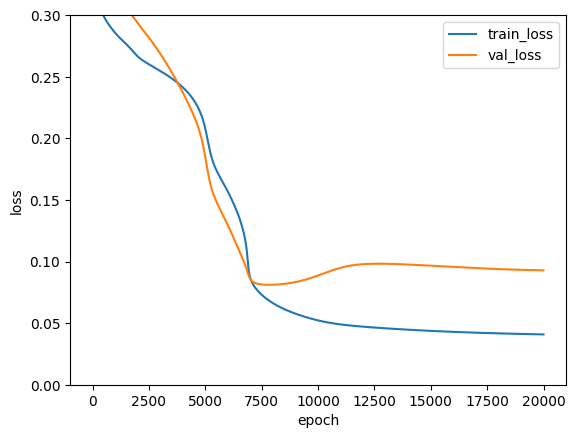

In [62]:
plt.ylim(0, 0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

#### XOR 문제를 MLP로 풀어보기

파이썬 버전

In [97]:
# 1. 패키지 로드
import numpy as np

# 2. MLP 구조 구성하는 게이트 클래스 구현
def sigmoid(x):
  return 1/(1+np.exp(-x))
def numerical_derivative(f, x):
  delta_x = 1e-4
  grad = np.zeros_like(x)
  it=np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    idx=it.multi_index
    tmp_val=x[idx]
    x[idx]=float(tmp_val) + delta_x
    fx1 = f(x)
    x[idx]=float(tmp_val) - delta_x
    fx2 = f(x)
    grad[idx]=(fx1 - fx2) / (2*delta_x)
    x[idx]=tmp_val
    it.iternext()
  return grad


class LogicGate:
  def __init__(self, gate_name, xdata, tdata):
    self.name=gate_name
    self.__xdata=xdata.reshape(4,2)
    self.__tdata=tdata.reshape(4,1)
    self.__w=np.random.rand(2,1)
    self.__b=np.random.rand(1)
    self.__learning_rate=1e-2
  # 손실 함수
  def __loss_function(self):
    delta=1e-7
    z=np.dot(self.__xdata, self.__w) + self.__b
    y=sigmoid(z)
    return -np.sum(self.__tdata*np.log(y+delta) + (1-self.__tdata)*np.log((1-y)+delta))
  # 손실 값 계산 함수
  def error_val(self):
    return self.__loss_function()


#학습
  def train(self):
    #손실함수 계산
    f=lambda x: self.__loss_function()
    print("초기 에러 값 = ", self.error_val())
    #손실함수에 대해 경사하강 가중치, 바이어스 업데이트
    for step in range(8001):
      self.__w -= self.__learning_rate * numerical_derivative(f, self.__w)
      self.__b -= self.__learning_rate * numerical_derivative(f, self.__b)
      if(step %400==0):
        print("step = ",step, "에러 값 = ", self.error_val())
  #예측 함수
  def predict(self, input_data):
    z=np.dot(input_data, self.__w) + self.__b
    y=sigmoid(z)
    if y > 0.5:
      result = 1
    else:
      result = 0
    return y, result


# AND
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
tdata=np.array([0,0,0,1])
AND_g=LogicGate("AND_GATE", xdata, tdata)
AND_g.train()
print(AND_g.name, '\n')
test_data=np.array([[0,0],[0,1],[1,0],[1,1]])
for input_data in test_data:
  (sigmoid_val, logical_val)=AND_g.predict(input_data)
  print(input_data, "=", logical_val, "\n")



# NAND
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
tdata=np.array([1,1,1,0])
NAND_g=LogicGate("NAND_GATE", xdata, tdata)
NAND_g.train()
print(NAND_g.name, '\n')
test_data=np.array([[0,0],[0,1],[1,0],[1,1]])
for input_data in test_data:
  (sigmoid_val, logical_val)=NAND_g.predict(input_data)
  print(input_data, "=", logical_val, "\n")



# OR
xdata=np.array([[0,0],[0,1],[1,0],[1,1]])
tdata=np.array([0,1,1,1])
OR_g=LogicGate("OR_GATE", xdata, tdata)
OR_g.train()
print(OR_g.name, '\n')
test_data=np.array([[0,0],[0,1],[1,0],[1,1]])
for input_data in test_data:
  (sigmoid_val, logical_val)=OR_g.predict(input_data)
  print(input_data, "=", logical_val, "\n")



# XOR 계산하기
input_data=np.array([[0,0],[0,1],[1,0],[1,1]])
s1=[] #NAND
s2=[] #OR
new_input_data=[] #AND 입력
final_output=[] #AND 출력
for index in range(len(input_data)):
  s1=NAND_g.predict(input_data[index])
  s2=OR_g.predict(input_data[index])
  new_input_data.append(s1[-1])
  new_input_data.append(s2[-1])
  (sigmoid_val, logical_val)=AND_g.predict(np.array(new_input_data))
  final_output.append(logical_val)
  new_input_data=[] #AND 입력 초기화
for index in range(len(input_data)):
  print(input_data[index], "=", final_output[index], end='')
  print('\n')

초기 에러 값 =  3.526609613936703
step =  0 에러 값 =  3.486271040522678
step =  400 에러 값 =  1.425730156146409
step =  800 에러 값 =  1.0837355413165288
step =  1200 에러 값 =  0.881371089912837
step =  1600 에러 값 =  0.7447147682935127
step =  2000 에러 값 =  0.6451319430201721
step =  2400 에러 값 =  0.5689327739630841
step =  2800 에러 값 =  0.5085996463884871
step =  3200 에러 값 =  0.45959576154237725
step =  3600 에러 값 =  0.4189928232033916
step =  4000 에러 값 =  0.3848039013355564
step =  4400 에러 값 =  0.35562779572278713
step =  4800 에러 값 =  0.33044552452780984
step =  5200 에러 값 =  0.3084971841662135
step =  5600 에러 값 =  0.2892040225386497
step =  6000 에러 값 =  0.2721172774950571
step =  6400 에러 값 =  0.2568835404160114
step =  6800 에러 값 =  0.24322068857684637
step =  7200 에러 값 =  0.23090078236102712
step =  7600 에러 값 =  0.21973767216453066
step =  8000 에러 값 =  0.20957786231145425
AND_GATE 

[0 0] = 0 

[0 1] = 0 

[1 0] = 0 

[1 1] = 1 

초기 에러 값 =  2.957368125756063
step =  0 에러 값 =  2.951178615169675
step =  

딥러닝 버전

In [98]:
import numpy as np

# 시그모이드 구하는 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 수치 미분 함수
def numerical_derivative(f, input_data):
    delta_x = 1e-4
    ret = np.zeros_like(input_data)
    it = np.nditer(input_data, flags=['multi_index'])
    while not it.finished:
        idx = it.multi_index
        tmp = input_data[idx]
        input_data[idx] = float(tmp) + delta_x
        fx1 = f(input_data)
        input_data[idx] = float(tmp) - delta_x
        fx2 = f(input_data)
        ret[idx] = (fx1 - fx2) / (2 * delta_x)
        input_data[idx] = tmp
        it.iternext()
    return ret

class LogicGate:
    def __init__(self, gate_name, x_data, t_data):
        self.name = gate_name
        # 입력 데이터
        self.__x_data = x_data
        self.__t_data = t_data
        # 임의의 W2, b2, W3, b3 준비
        self.__W2 = np.random.rand(2, 6)
        self.__b2 = np.random.rand(6)
        self.__W3 = np.random.rand(6, 1)
        self.__b3 = np.random.rand(1)
        self.__learning_rate = 1e-1
        self.loss_func = self.__feed_forward
    
    # feed_forward 함수로, 에러를 찾아줌
    def __feed_forward(self):
        delta = 1e-7
        # 입력층 -> 은닉층
        z2 = np.dot(self.__x_data, self.__W2) + self.__b2
        a2 = sigmoid(z2)
        # 은닉층 -> 출력층
        z3 = np.dot(a2, self.__W3) + self.__b3
        y = sigmoid(z3)
        # 크로스 엔트로피로 에러를 측정
        return -np.sum(self.__t_data * np.log(y + delta) + (1 - self.__t_data) * np.log(1 - y + delta))
    
    def train(self):
        f = lambda x: self.__feed_forward()
        print("Initial W2 = ", self.__W2, "b2 = ", self.__b2, "W3 = ", self.__W3, "b3 = ", self.__b3, "error_val = ", self.loss_func())
        for step in range(8001):
            self.__W2 -= self.__learning_rate * numerical_derivative(f, self.__W2)
            self.__b2 -= self.__learning_rate * numerical_derivative(f, self.__b2)
            self.__W3 -= self.__learning_rate * numerical_derivative(f, self.__W3)
            self.__b3 -= self.__learning_rate * numerical_derivative(f, self.__b3)
            if step % 400 == 0:
                print("step = ", step, "W2 = ", self.__W2, "b2 = ", self.__b2, "W3 = ", self.__W3, "b3 = ", self.__b3, "error_val = ", self.loss_func())
                
    def predict(self, x_data):
        z2 = np.dot(x_data, self.__W2) + self.__b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, self.__W3) + self.__b3
        pro = sigmoid(z3)
        if pro < 0.5:
            return 0, pro
        return 1, pro

# XOR 데이터
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).reshape([4, 2])
y_data = np.array([0, 1, 1, 0]).reshape([4, 1])

# 학습
XOR_Gate = LogicGate("XOR_Gate", x_data, y_data)
XOR_Gate.train()

# 출력
print(XOR_Gate.predict([0, 0]))
print(XOR_Gate.predict([1, 0]))
print(XOR_Gate.predict([0, 1]))
print(XOR_Gate.predict([1, 1]))

Initial W2 =  [[0.62298607 0.89313984 0.80743868 0.82831544 0.14097794 0.4105227 ]
 [0.14962902 0.48706702 0.79096016 0.95803605 0.40307835 0.95913121]] b2 =  [0.5695191  0.99791258 0.71617357 0.4179634  0.31819801 0.14379179] W3 =  [[0.22499007]
 [0.35046233]
 [0.44607466]
 [0.79067515]
 [0.07284486]
 [0.06472456]] b3 =  [0.65098064] error_val =  4.7170207768400685
step =  0 W2 =  [[0.62000891 0.89105082 0.80475667 0.82321849 0.13976041 0.40979763]
 [0.14675131 0.48511258 0.78829241 0.95285424 0.40185005 0.95837851]] b2 =  [0.56251615 0.99034974 0.70559171 0.39764067 0.3155967  0.14178804] W3 =  [[ 0.11182207]
 [ 0.22048257]
 [ 0.32132808]
 [ 0.67242548]
 [-0.02863313]
 [-0.04269782]] b3 =  [0.51622669] error_val =  3.7790372603021845
step =  400 W2 =  [[ 0.85916507  0.8515632   1.10272784  2.65641014  0.12910477  0.0789658 ]
 [-0.13424343  0.34394973  1.10353287  2.70221084  0.57423493  1.00783141]] b2 =  [ 0.56287703  0.97625421  0.69344004 -0.26102042  0.32600294  0.04786983] W3 = 

MLP 코드 정리

In [99]:
# 패키지 임포트
import numpy as np

# 학습 데이터 셋 생성
X=np.array(
    [1,2,3,4,5]
).reshape(5,1)
X


y=np.array(
    [2,3,4,5,6]
).reshape(5,1)
y

# W,b 초기화
W=np.random.rand(1,1)
b=np.random.rand(1)
print(
    "W=",W,
    ",W.shape",W.shape,
    ",b=",b,
    ",b.shape",b.shape
)

# 손실함수 정의
def loss_func(x, t):
  # H(x)를 정의 - 행렬 계산
  y=np.dot(x,W)+b
  return np.sum((t - y)**2) /len(x)

# 수치미분 함수 정의
def numerical_derivative(fx, input_list):
  delta_x=1e-4 # 1* 0.00001
  ret=np.zeros_like(input_list)
  it=np.nditer(input_list, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    i=it.multi_index
    tmp=input_list[i]
    input_list[i]=float(tmp) - delta_x
    f1=fx(input_list)
    input_list[i]=float(tmp) + delta_x
    f2=fx(input_list)
    ret[i]=(f2-f1) / (delta_x*2)
    input_list[i]=tmp
    it.iternext()
  return ret


# 손실함수 계산- 에러 값 계산
def error_val(x, t):
  # H(x)를 정의 - 행렬 계산
  y=np.dot(x,W)+b
  return np.sum((t - y)**2) /len(x)


# W,b 업데이트 수행 - 학습
#학습율
learning_rate=1e-2
f = lambda x: loss_func(X, y)
print(
    "초기 에러 값 =", error_val(X,y),
    "초기 W 값 =",W,
    "초기 b 값 =",b
)
for step in range(10001):
  # W,b 를 경사하강으로 업데이트
  W -= numerical_derivative(f,W) * learning_rate
  b -= numerical_derivative(f,b) * learning_rate
  if step % 500 == 0:
    print(
        "step = ", step,
        "에러 값 =", error_val(X,y),
        "W 값 =",W,
        "b 값 =",b
    )


# 학습된 결과로 현장 적용 후 예측 함수 정의
def predict(x):
  y=np.dot(x,W)+b
  return y

predict(47)

W= [[0.94721797]] ,W.shape (1, 1) ,b= [0.26479363] ,b.shape (1,)
초기 에러 값 = 0.8040078772112974 초기 W 값 = [[0.94721797]] 초기 b 값 = [0.26479363]
step =  0 에러 값 = 0.5067499981032563 W 값 = [[1.0029424]] b 값 = [0.27932121]
step =  500 에러 값 = 0.002703634887302982 W 값 = [[1.03376531]] b 값 = [0.87812635]
step =  1000 에러 값 = 8.670101711901043e-05 W 값 = [[1.00604657]] b 값 = [0.97817532]
step =  1500 에러 값 = 2.7803555889791183e-06 W 값 = [[1.0010828]] b 값 = [0.99609172]
step =  2000 에러 값 = 8.916132080138662e-08 W 값 = [[1.0001939]] b 값 = [0.99930012]
step =  2500 에러 값 = 2.8592533842257165e-09 W 값 = [[1.00003472]] b 값 = [0.99987467]
step =  3000 에러 값 = 9.169144021097655e-11 W 값 = [[1.00000622]] b 값 = [0.99997756]
step =  3500 에러 값 = 2.9403900529559547e-12 W 값 = [[1.00000111]] b 값 = [0.99999598]
step =  4000 에러 값 = 9.429335662683983e-14 W 값 = [[1.0000002]] b 값 = [0.99999928]
step =  4500 에러 값 = 3.023829169422564e-15 W 값 = [[1.00000004]] b 값 = [0.99999987]
step =  5000 에러 값 = 9.696910563689273e-17 W 값 = [

array([[48.]])

### 활성화 함수

softmax function 작동방식

In [96]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
#데이터셋
input_data = data['data'] # 꽃의  특징 (input data)
target_data = data['target'] #꽃  종류를  수치로 나탄내  것 (0 ~ 2) (target data)
flowers = data['target_names'] # 꽃  종류를  이름으로  나타낸  것
feature_names = data['feature_names'] # 꽃  특징들의  명칭
#sepal : 꽃받침
#petal : 꽃잎
print('꽃을  결정짓는  특징 :   {}'.format(feature_names))
print('꽃  종류 :   {}'.format(flowers))

꽃을  결정짓는  특징 :   ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃  종류 :   ['setosa' 'versicolor' 'virginica']


In [64]:
iris_df = pd.DataFrame(input_data, columns=feature_names)
iris_df['species'] = target_data
#맨  위에  있는  데이터 10개  출력
print(iris_df.head(10))
#데이터의  정보  출력
print(iris_df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  


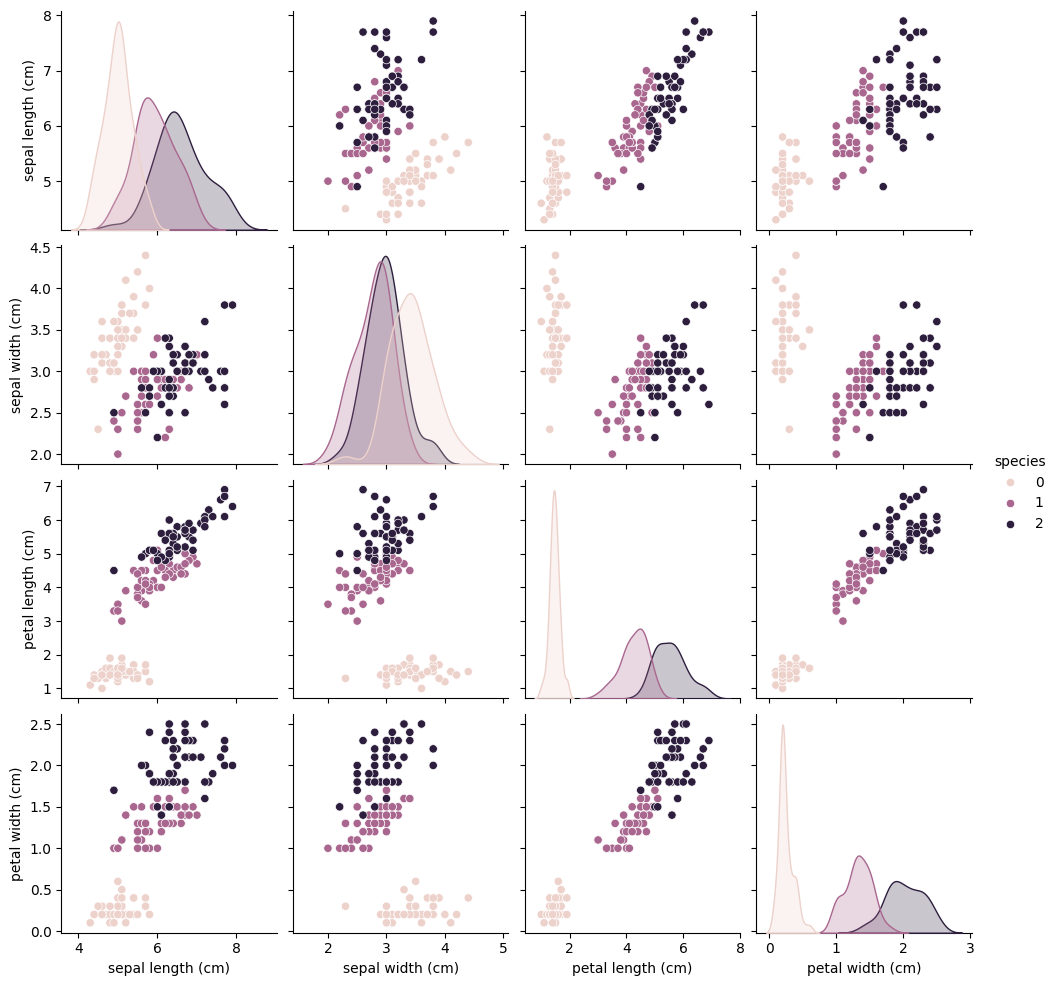

In [65]:
#4가지 변수(특징)의 관계를 'seaborn' 라이브러리에서 제공하는 pairplot() 메소드로 표현한 그래프 16가지

sns.pairplot(iris_df, hue='species', vars=feature_names)
plt.show()

In [66]:
#훈련  데이터와  테스트  데이터  분리
train_input, test_input, train_target, test_target = train_test_split(
    input_data, target_data, random_state=42)
#표준점수로  데이터  스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

In [67]:
lr = LogisticRegression(max_iter=1000)
#로지스틱  회귀  학습
lr.fit(train_scaled, train_target)
#테스트  데이터  예측
pred = lr.predict(test_scaled[:5])
print(pred)

[1 0 2 1 1]


In [68]:
#각 특징들의 가중치(weight)와 절편(bias)을 확인

#로지스틱  회귀  모델의  가중치와  절편
#다중  분류  가중치와  절편을  출력하면, 각  클래스마다의  가중치  절편을  출력한다.
print(lr.coef_, lr.intercept_)

[[-0.97449266  1.08880261 -1.78283907 -1.65251435]
 [ 0.5069819  -0.30313907 -0.3284927  -0.69092592]
 [ 0.46751076 -0.78566354  2.11133177  2.34344027]] [-0.39090416  1.92359793 -1.53269377]


In [69]:
setosa_z1 = (-0.96 * 5.1) + (1.09 * 3.5) + (-1.78 * 1.4) + (-1.66 * 0.2) - 0.39
versicolor_z2 = (0.51 * 5.1) + (-0.30 * 3.5) + (-0.32 * 1.4) + (-0.7 * 0.2) - 1.92
virginica_z3 = (0.47 * 5.1) + (-0.79 * 3.5) + (2.11 * 1.4) + (2.34 * 0.2) - 1.53
print(setosa_z1)
print(versicolor_z2)
print(virginica_z3)

setosa_rs=setosa_z1/(setosa_z1+versicolor_z2+virginica_z3)
versicolor_rs=versicolor_z2/(setosa_z1+versicolor_z2+virginica_z3)
virginica_rs=virginica_z3/(setosa_z1+versicolor_z2+virginica_z3)
print(setosa_rs)
print(versicolor_rs)
print(virginica_rs)

-4.294999999999999
-0.957
1.5239999999999994
1.1520922746781115
0.25670600858369097
-0.40879828326180245


In [70]:
#decision_function()에 테스트 데이터 5개를 넣고 소수점 2자리까지 출력
#결정  함수(decision_function)로 z1 ~ z3의  값을  구한다.
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-2.2   2.1   0.1 ]
 [ 5.87  2.56 -8.43]
 [-9.33  1.8   7.53]
 [-2.29  1.73  0.56]
 [-3.59  2.33  1.25]]


In [71]:
#소프트맥스 함수를 사용한 각 클래스들의 확률
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.012 0.87  0.118]
 [0.965 0.035 0.   ]
 [0.    0.003 0.997]
 [0.013 0.752 0.234]
 [0.002 0.745 0.253]]


## DNN과 프레임워크

### Deep-learning

텐서플로 익히기

In [100]:
import tensorflow as tf
with tf.compat.v1.Session() as sess:
   helloworld = tf.constant("Hello World!")
   print(sess.run(helloworld))


b'Hello World!'


In [101]:
import tensorflow as tf

print(tf.__version__)
a=tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.19.0
tf.Tensor(
[[0.01574671 0.13161254 0.20166564]
 [0.6410955  0.30881262 0.36038494]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [102]:
import tensorflow as tf
import numpy as np

t=tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print("tensorflow로 생성한 텐서:\n",t,"\n")
print("numpy로 생성한 ndarray:\n",n,"\n")

res=t+n # 텐서 t와 ndarray n의 덧셈
print("덧셈 결과:\n",res)

tensorflow로 생성한 텐서:
 tf.Tensor(
[[0.07936609 0.8978188  0.10995173]
 [0.9163153  0.05436218 0.7414242 ]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray:
 [[0.27137195 0.46361173 0.79636011]
 [0.17339017 0.31105186 0.19089566]] 

덧셈 결과:
 tf.Tensor(
[[0.35073805 1.3614305  0.90631187]
 [1.0897055  0.36541402 0.9323199 ]], shape=(2, 3), dtype=float32)


텐서 기본 사용

In [103]:
#import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = x * W + b
cost = tf.reduce_mean(tf.square(hypothesis - y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _cost, _W, _b, _ = \
        sess.run([cost, W, b, train],
            feed_dict={x: [1, 2, 3, 4, 5], y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 20 == 0:
        print(step, _cost, _W, _b)

print(sess.run(hypothesis, feed_dict={x: [5]}))
print(sess.run(hypothesis, feed_dict={x: [2.5]}))
print(sess.run(hypothesis, feed_dict={x: [1.5, 3.5]}))


Instructions for updating:
non-resource variables are not supported in the long term

0 40.16148 [-0.45566317] [1.0879326]
20 0.021936947 [0.89985216] [1.4377736]
40 0.018442605 [0.9121029] [1.417229]
60 0.016106056 [0.91788495] [1.3964607]
80 0.014065502 [0.92326295] [1.377045]
100 0.012283536 [0.9282885] [1.358901]
120 0.010727296 [0.932985] [1.3419453]
140 0.0093681915 [0.93737394] [1.3261]
160 0.008181326 [0.94147533] [1.3112925]
180 0.00714482 [0.94530815] [1.297455]
200 0.0062396214 [0.94889] [1.2845235]
220 0.005449115 [0.9522371] [1.272439]
240 0.0047587594 [0.9553652] [1.2611458]
260 0.0041558654 [0.95828825] [1.2505924]
280 0.003629344 [0.9610201] [1.2407298]
300 0.0031695373 [0.96357286] [1.2315134]
320 0.002767973 [0.96595854] [1.2229005]
340 0.0024172966 [0.9681879] [1.2148517]
360 0.0021110482 [0.9702713] [1.20733]
380 0.0018435832 [0.9722182] [1.2003008]
400 0.001610027 [0.97403777] [1.193732]
420 0.0014060413 [0.975738] [1.1875933]
440 0.0012279159 [0.9773269] [1.18185

구조 변경1

In [104]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#데이터 셋
x_train=[1,2,3]
y_train=[4,5,6]
W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")
#(H(x))
hypothesis=x_train*W+b
#손실함수
cost=tf.reduce_mean(tf.square(hypothesis-y_train))
#경사하강
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
#개선
train=optimizer.minimize(cost)
#훈련
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    sess.run(train)
    if (step % 20 == 0):
        print(step, '\t', sess.run(cost), '\t', sess.run(W), '\t', sess.run(b))

0 	 46.45165 	 [-0.9358226] 	 [0.2419111]
20 	 0.7503021 	 [1.4184362] 	 [1.3671527]
40 	 0.30573124 	 [1.6142794] 	 [1.5386931]
60 	 0.27426347 	 [1.605931] 	 [1.6163961]
80 	 0.24905957 	 [1.5794084] 	 [1.68228]
100 	 0.22619963 	 [1.5523643] 	 [1.74429]
120 	 0.20543809 	 [1.526423] 	 [1.8033116]
140 	 0.18658216 	 [1.5016847] 	 [1.8595523]
160 	 0.16945688 	 [1.4781075] 	 [1.9131492]
180 	 0.15390342 	 [1.4556383] 	 [1.9642271]
200 	 0.13977756 	 [1.434225] 	 [2.0129046]
220 	 0.12694822 	 [1.4138179] 	 [2.0592947]
240 	 0.11529624 	 [1.39437] 	 [2.103505]
260 	 0.10471386 	 [1.3758357] 	 [2.1456373]
280 	 0.09510278 	 [1.3581728] 	 [2.1857889]
300 	 0.086373955 	 [1.3413401] 	 [2.2240536]
320 	 0.07844628 	 [1.3252984] 	 [2.2605202]
340 	 0.071246155 	 [1.3100107] 	 [2.2952728]
360 	 0.064706735 	 [1.295441] 	 [2.328393]
380 	 0.058767665 	 [1.2815562] 	 [2.3599567]
400 	 0.053373635 	 [1.2683241] 	 [2.3900368]
420 	 0.048474815 	 [1.2557137] 	 [2.4187026]
440 	 0.04402555 	 [1.24

구조변경 2

In [105]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#데이터 셋
x_train=tf.placeholder(tf.float32, shape=[None]) #x_train=[1,2,3]
y_train=tf.placeholder(tf.float32, shape=[None]) #y_train=[1,2,3]
W=tf.Variable(tf.random_normal([1]), name="weight")
b=tf.Variable(tf.random_normal([1]), name="bias")
#(H(x))
hypothesis=x_train*W+b
#손실함수
cost=tf.reduce_mean(tf.square(hypothesis-y_train))
#경사하강
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
#개선
train=optimizer.minimize(cost)
#훈련
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    #sess.run(train)
    _cost, _W, _b, _= \
      sess.run([cost, W, b, train],
               feed_dict={
                   x_train: [1,2,3],
                   y_train: [4,5,6]
               })
    if step % 20 == 0:
      print(step, _cost, _W, _b)
print(sess.run(hypothesis, feed_dict={x_train: [4]}))

0 25.811743 [0.43165118] [-0.3788638]
20 1.124777 [1.9350971] [0.42954895]
40 0.819191 [2.031765] [0.6122068]
60 0.7421679 [1.9966651] [0.730314]
80 0.67403215 [1.9511002] [0.83754176]
100 0.61216646 [1.9065233] [0.93922275]
120 0.5559794 [1.8639318] [1.0360768]
140 0.5049492 [1.8233312] [1.1283745]
160 0.45860323 [1.7846378] [1.2163339]
180 0.4165108 [1.7477628] [1.3001597]
200 0.37828168 [1.7126205] [1.380046]
220 0.34356162 [1.6791301] [1.4561777]
240 0.31202808 [1.6472135] [1.5287317]
260 0.28338882 [1.6167969] [1.597876]
280 0.2573783 [1.5878097] [1.6637706]
300 0.2337551 [1.5601846] [1.7265685]
320 0.21230008 [1.5338581] [1.7864151]
340 0.1928144 [1.5087687] [1.8434492]
360 0.17511688 [1.4848582] [1.8978033]
380 0.1590439 [1.4620717] [1.9496027]
400 0.14444616 [1.4403559] [1.9989675]
420 0.13118827 [1.4196606] [2.0460126]
440 0.11914728 [1.3999381] [2.0908468]
460 0.10821152 [1.3811425] [2.1335735]
480 0.09827936 [1.3632303] [2.1742926]
500 0.08925903 [1.3461599] [2.2130973]
520 

XOR 문제 해결

In [106]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

xy = np.loadtxt('datasets/train.txt')
print(xy)

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [107]:
x_data = xy[0:-1]
y_data = xy[-1]

print(x_data)
print("*****")
print(y_data)

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]]
*****
[1. 1. 0.]


In [108]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([1, len(x_data)], -1.0, 1.0))

In [109]:
# Our hypothesis
h = tf.matmul(W, X)
hypothesis = tf.div(1., 1.+tf.exp(-h))

# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

learning_rate = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


init = tf.global_variables_initializer()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [110]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(5001):
        sess.run(train, feed_dict={X:x_data, Y:y_data })
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

# Test model
    correct_prediction = tf.equal(tf.floor(hypothesis+0.5), Y)

# Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(sess.run([hypothesis, tf.floor(hypothesis+0.5), correct_prediction, accuracy],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.7484476 [[ 0.50216126 -0.470516    0.95354426]]
500 0.713108 [[ 0.50216126 -0.403827    0.54777265]]
1000 0.70150787 [[ 0.50216126 -0.2944069   0.3362603 ]]
1500 0.6967666 [[ 0.50216126 -0.2023053   0.21436223]]
2000 0.6947213 [[ 0.50216126 -0.135729    0.13918857]]
2500 0.6938317 [[ 0.50216126 -0.09014758  0.09113859]]
3000 0.6934447 [[ 0.50216126 -0.05961495  0.05989863]]
3500 0.69327646 [[ 0.50216126 -0.03935001  0.03943114]]
4000 0.6932033 [[ 0.50216126 -0.02595273  0.0259759 ]]
4500 0.69317156 [[ 0.50216126 -0.01711074  0.01711733]]
5000 0.69315785 [[ 0.50216126 -0.01127947  0.01128131]]
[array([[0.50282025, 0.49718013, 0.5000005 ]], dtype=float32), array([[1., 0., 1.]], dtype=float32), array([[ True, False, False]]), np.float32(0.33333334)]
Accuracy: 0.33333334


XOR 문제 해결-각 입력 인스턴스에 대한 모델이 예측한 확률

In [111]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np

xy = np.loadtxt('./datasets/train.txt')
print(xy)

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [112]:
x_data = xy[:,:-1]
y_data = xy[:,-1]

print(x_data)
print("*****")
print(y_data)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
*****
[0. 1. 1. 0.]


In [113]:
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))

In [114]:
# Our hypothesis
h = tf.matmul(X, W)
hypothesis = tf.div(1., 1.+tf.exp(-h))

# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))

learning_rate = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)


init = tf.global_variables_initializer()

In [115]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(5001):
        sess.run(train, feed_dict={X:x_data, Y:y_data })
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

# Test model
    correct_prediction = tf.equal(tf.floor(hypothesis + 0.5), tf.reshape(Y, [-1, 1]))


# Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    h_val, p_val, c_val, a_val = sess.run([hypothesis, tf.floor(hypothesis + 0.5), correct_prediction, accuracy], feed_dict={X: x_data, Y: y_data})
    print("각 입력 인스턴스에 대한 모델이 예측한 확률:\n", h_val, "\nPredicted:\n", p_val, "\nCorrect:\n", c_val, "\nAccuracy:", a_val)

0 0.71219563 [[-0.608747  ]
 [ 0.12907498]]
500 0.6994125 [[-0.36626664]
 [ 0.17596965]]
1000 0.69587195 [[-0.23610137]
 [ 0.16125686]]
1500 0.6945088 [[-0.16013819]
 [ 0.13078326]]
2000 0.69386137 [[-0.11220533]
 [ 0.10070543]]
2500 0.6935272 [[-0.08014522]
 [ 0.07564273]]
3000 0.6933503 [[-0.05787072]
 [ 0.05610846]]
3500 0.69325584 [[-0.04203786]
 [ 0.04134823]]
4000 0.6932053 [[-0.03063627]
 [ 0.03036642]]
4500 0.6931783 [[-0.02236629]
 [ 0.0222607 ]]
5000 0.6931639 [[-0.01634412]
 [ 0.0163028 ]]
각 입력 인스턴스에 대한 모델이 예측한 확률:
 [[0.5       ]
 [0.50407565]
 [0.49591404]
 [0.49998963]] 
Predicted:
 [[1.]
 [1.]
 [0.]
 [0.]] 
Correct:
 [[False]
 [ True]
 [False]
 [ True]] 
Accuracy: 0.5


MNIST 숫자 데이터를 분류하는 DNN 구현

In [116]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


# MNIST Dataset Load!
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [117]:
################
# layer params #
################
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

inputs = tf.placeholder(tf.float32, shape=[None, n_inputs], name="inputs")
labels = tf.placeholder(tf.int32, shape=[None], name="outputs")

In [118]:
def neuron_layer(inputs, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(inputs.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal([n_inputs, n_neurons], stddev=stddev)
        weights = tf.Variable(init, name="weights")
        bias = tf.Variable(tf.zeros([n_neurons]), name='bias')
        Z = tf.matmul(inputs, weights) + bias
        if activation:
            return activation(Z)
        else:
            return Z

In [119]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(inputs, n_hidden1, name='hidden1', 
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name='hidden2',
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name='logits')

In [120]:
with tf.name_scope('loss'):
    cross_entropy = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits))

In [121]:
################
# Hyper-params #
################
learning_rate = 0.01
n_epochs = 40
batch_size = 50

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train_op = optimizer.minimize(cross_entropy)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(predictions=logits, targets=labels, k=1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [122]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [123]:
# train
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(train_op, feed_dict={inputs: X_batch,
                                          labels: y_batch})
        
        acc_batch = accuracy.eval(feed_dict={inputs: X_batch, labels: y_batch})
        acc_valid = accuracy.eval(feed_dict={inputs: X_valid, labels: y_valid})
        print('epoch: {:03d}, bacth acc: {:.4f}, valid acc: {:.4f}'.format(epoch,
                                                                          acc_batch,
                                                                          acc_valid))

epoch: 000, bacth acc: 0.8800, valid acc: 0.9146
epoch: 001, bacth acc: 0.9600, valid acc: 0.9310
epoch: 002, bacth acc: 0.9000, valid acc: 0.9396
epoch: 003, bacth acc: 0.9400, valid acc: 0.9496
epoch: 004, bacth acc: 0.9600, valid acc: 0.9550
epoch: 005, bacth acc: 0.9400, valid acc: 0.9536
epoch: 006, bacth acc: 0.9800, valid acc: 0.9600
epoch: 007, bacth acc: 1.0000, valid acc: 0.9648
epoch: 008, bacth acc: 0.9600, valid acc: 0.9674
epoch: 009, bacth acc: 0.9600, valid acc: 0.9670
epoch: 010, bacth acc: 1.0000, valid acc: 0.9682
epoch: 011, bacth acc: 0.9800, valid acc: 0.9678
epoch: 012, bacth acc: 0.9800, valid acc: 0.9702
epoch: 013, bacth acc: 0.9600, valid acc: 0.9718
epoch: 014, bacth acc: 0.9800, valid acc: 0.9730
epoch: 015, bacth acc: 0.9600, valid acc: 0.9716
epoch: 016, bacth acc: 0.9600, valid acc: 0.9722
epoch: 017, bacth acc: 1.0000, valid acc: 0.9742
epoch: 018, bacth acc: 1.0000, valid acc: 0.9748
epoch: 019, bacth acc: 1.0000, valid acc: 0.9750
epoch: 020, bacth ac

### 신경망 하이퍼파라미터 튜닝하기

신경망 구현: MLP: Neural Network with 2 layers

In [124]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network
W1 = tf.Variable(tf.random_uniform([2, 2], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([2]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1)+b1)
hypothesis = tf.sigmoid(tf.matmul(L2, W2)+b2)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(7001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    # Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.69342357
500 0.6931496
1000 0.69314826
1500 0.6931467
2000 0.6931447
2500 0.69314206
3000 0.6931386
3500 0.6931337
4000 0.69312716
4500 0.6931181
5000 0.69310564
5500 0.6930885
6000 0.6930644
6500 0.6930302
7000 0.69298005
[array([[0.5030322 ],
       [0.5060817 ],
       [0.49345455],
       [0.49606526]], dtype=float32)]
Accuracy: 0.5


신경망 구현: MLP: Wide Neural Network with 2 layers

In [125]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network - we will use 10 units
W1 = tf.Variable(tf.random_uniform([2, 10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10, 1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([10]), name="Bias1")
b2 = tf.Variable(tf.zeros([1]), name="Bias2")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1)+b1)
hypothesis = tf.sigmoid(tf.matmul(L2, W2)+b2)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(30001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    # Calculate Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.70386875
2000 0.65196496
4000 0.096394025
6000 0.027739206
8000 0.015003707
10000 0.010042851
12000 0.0074616633
14000 0.005896091
16000 0.0048518945
18000 0.004108837
20000 0.0035547295
22000 0.0031265835
24000 0.002786384
26000 0.0025099418
28000 0.0022811375
30000 0.002088822
[array([[0.0010325 ],
       [0.9983176 ],
       [0.9974857 ],
       [0.00311614]], dtype=float32)]
Accuracy: 1.0


신경망 구현: MLP: Deep Neural Network

In [126]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network - we will use 3 layers.
W1 = tf.Variable(tf.random_uniform([2,10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10,5], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([5,1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([10]), name="Bias1")
b2 = tf.Variable(tf.zeros([5]), name="Bias2")
b3 = tf.Variable(tf.zeros([1]), name="Bias3")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
L3 = tf.sigmoid(tf.matmul(L2, W2) + b2)
hypothesis = tf.sigmoid(tf.matmul(L3, W3) + b3)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(30001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 2000 == 0:
            print(step,
                sess.run(cost, feed_dict={X:x_data, Y:y_data})
                #sess.run(W1),
                #sess.run(W2)
            )
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.81161594
2000 0.6920405
4000 0.67967445
6000 0.2796101
8000 0.020025037
10000 0.007666969
12000 0.0044189906
14000 0.00301535
16000 0.0022540023
18000 0.001783326
20000 0.0014665469
22000 0.0012402
24000 0.0010711765
26000 0.0009405913
28000 0.00083689974
30000 0.0007527557
[array([[5.4288696e-04],
       [9.9946678e-01],
       [9.9907058e-01],
       [1.0042891e-03]], dtype=float32)]
Accuracy: 1.0


신경망 구현: MLP: Deep Neural Network 좀 더 깊이를 더하면…

In [127]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
xy = np.loadtxt('./datasets/train.txt', unpack=True)
x_data = np.transpose(xy[0:-1])
y_data = np.reshape(xy[-1],(4,1))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# define 2 layer Neural Network - we will use 3 layers.
W1 = tf.Variable(tf.random_uniform([2,10], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([10,10], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([10,10], -1.0, 1.0))
W4 = tf.Variable(tf.random_uniform([10,1], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([10]), name="Bias1")
b2 = tf.Variable(tf.zeros([10]), name="Bias2")
b3 = tf.Variable(tf.zeros([10]), name="Bias3")
b4 = tf.Variable(tf.zeros([1]), name="Bias4")
# Our hypothesis
L2 = tf.sigmoid(tf.matmul(X, W1) + b1)
L3 = tf.sigmoid(tf.matmul(L2, W2) + b2)
L4 = tf.sigmoid(tf.matmul(L3, W3) + b2)
hypothesis = tf.sigmoid(tf.matmul(L4, W4) + b4)
# Cross entropy cost function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# For this time, learning rate is very important.
learning_rate = tf.Variable(0.3)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(30001):
        sess.run(train, feed_dict={X:x_data, Y:y_data})
        if step % 2000 == 0:
            print(step,
                sess.run(cost, feed_dict={X:x_data, Y:y_data})
                #sess.run(W1),
                #sess.run(W2)
            )
    # Test model
    correct = tf.equal(tf.floor(hypothesis+0.5), Y)
    accuracy = tf.reduce_mean(tf.cast(correct, "float"))
    print(sess.run([hypothesis],feed_dict={X:x_data, Y:y_data}))
    print("Accuracy:", accuracy.eval({X:x_data, Y:y_data}))

0 0.69213617
2000 0.0052003106
4000 0.001108187
6000 0.0005864514
8000 0.00039181695
10000 0.00029171983
12000 0.00023121948
14000 0.00019090294
16000 0.0001622129
18000 0.00014079653
20000 0.00012422414
22000 0.00011102009
24000 0.00010029007
26000 9.140809e-05
28000 8.391212e-05
30000 7.7518984e-05
[array([[5.3673080e-05],
       [9.9992490e-01],
       [9.9991882e-01],
       [1.0011583e-04]], dtype=float32)]
Accuracy: 1.0
